In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plot

In [3]:
data = pd.read_csv("C:/Users/Harshal Trivedi/Downloads/friend_track_data.csv")

In [4]:
data1 = data.drop_duplicates()

In [5]:
data2 = data1["date"].str.split(',', expand=True)

In [6]:
data1 = pd.concat([data1, data2], axis=1)

In [7]:
data1 = data1.drop("date",axis=1)

In [8]:
data1.rename(columns = {0:'Date',1:'Time'}, inplace = True)

In [9]:
data12 = data1["Time"].str.split(':', expand=True)
data12 = pd.concat([data12, data1], axis=1)
data12.rename(columns = {0:'Hrs',1:'time'}, inplace = True)

In [10]:
data12 = data12.drop("Time",axis=1)

In [11]:
data12['time'] = data12['time'].astype(int)
data12['Hrs'] = data12['Hrs'].astype(int)

In [12]:
for i in range(0,len(data12)):
    data12.time.iloc[i] = data12.Hrs.iloc[i]*60 + data12.time.iloc[i]

C:\Users\Harshal Trivedi\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
data12 = data12.drop("Hrs",axis=1)

In [18]:
#here the x value is the date while y is the dataframe
def meandeltat(x,y):
    df1 = y.loc[y.Date == x]
    df2 = df1.drop(['album','artist'],axis=1)
    groupdata=df2.groupby('track')
    arr = {}
    i = 0
    for song, group in groupdata:
        arr[i] = group
        i = i + 1
    df3 = pd.DataFrame(arr.items(), columns=['id', 'comb'])
    az = pd.DataFrame()
    arr1 = []
    for i in range(0,len(df3)):
        s = 0
        az = df3.comb[i].sort_values(by=['time'])
        if(len(az)!=1):
            for j in range(0,len(az)):
                for k in range(j,len(az)):
                    y = az['time'].iloc[k] - az['time'].iloc[j]
                    s = s + y
                mean = s/len(az)
            arr1.insert(i,mean)
    overall_mean = np.mean(arr1)
    arr1.sort(reverse = True)
    xa = np.arange(0,len(arr1))
    ya = np.array(arr1)
 
    # plotting
    plot.title("Line graph for all difference of t")
    plot.xlabel("X axis: difference in time")
    plot.ylabel("Y axis: total number")
    plot.plot(xa, ya, color ="green")
    plot.show()
    return print("mean of time difference: ",overall_mean)

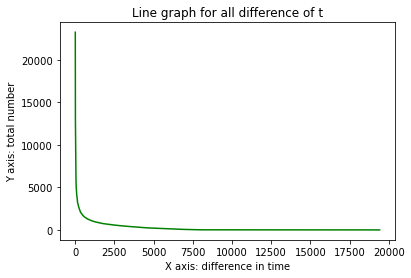

mean of time difference:  241.7787132394859


In [19]:
 meandeltat('31 Jan 2021',data12)